In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.drop_duplicates(inplace=True) #drop duplicates
df.duplicated().sum() #check duplicates again


0

In [4]:
# drop NaN values in genres column and reindex the table
df.dropna(subset=['genres'],inplace=True) 
df.reset_index(inplace=True)
df.drop('index', axis='columns', inplace=True)
#1) Which genres are most popular from year to year?
# First, let's find all genres of data set

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [42]:
df['genres'], df['genre_details'] = df['genres'].str.split('|', 1).str

In [43]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,genre_details
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Adventure|Science Fiction|Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,Adventure|Science Fiction|Thriller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,Science Fiction|Thriller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,Adventure|Science Fiction|Fantasy
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,Crime|Thriller


In [46]:
#2) What kinds of properties are associated with movies that have high profits?
df['profit'] = (df['revenue']-df['budget'])

In [47]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,genre_details
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Adventure|Science Fiction|Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,Adventure|Science Fiction|Thriller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,Science Fiction|Thriller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,Adventure|Science Fiction|Fantasy
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,Crime|Thriller


In [60]:
df['genres'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [48]:
df.groupby(['genres', 'release_year'])['profit'].sum()

genres   release_year
Action   1960             50905000
         1961             22900000
         1962            -10000000
         1963             69398765
         1964                    0
         1965             14744885
         1966              4547000
         1967            122384787
         1968             39910873
         1969            -16360000
         1970             81031757
         1971            152149968
         1972            150442861
         1973             58137595
         1974            267666653
         1975             53860696
         1976             65700445
         1977            153237428
         1978            157478223
         1979            194561469
         1980            199187699
         1981             76805359
         1982            119769446
         1983            157797132
         1984            550448322
         1985            408926790
         1986            224010613
         1987            56404401

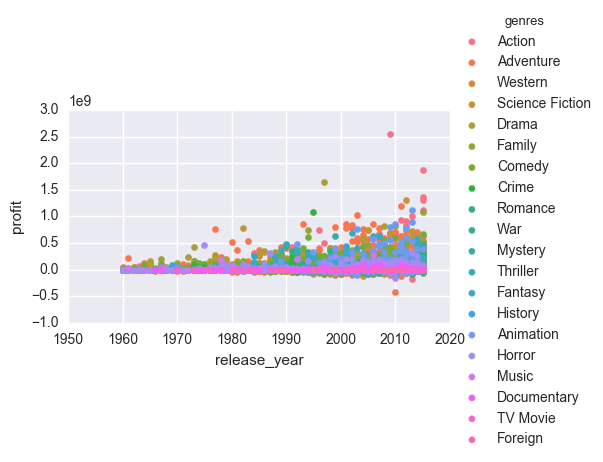

In [63]:
#plt.scatter(df.release_year, df.profit, )
#plt.show()
_genres= ['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign']

fg = sns.FacetGrid(data=df, hue='genres', hue_order=_genres, aspect=1.61)
fg.map(plt.scatter, 'release_year', 'profit').add_legend()

In [50]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,1.000000,-0.013371,-0.140752,-0.098793,-0.086702,-0.034908,-0.060599,0.511300,-0.188485,-0.138126,-0.074629
popularity,-0.013371,1.000000,0.545271,0.663268,0.138433,0.800786,0.210432,0.090200,0.513311,0.608964,0.628941
budget,-0.140752,0.545271,1.000000,0.734851,0.191079,0.632601,0.081729,0.116312,0.968949,0.622406,0.570137
revenue,-0.098793,0.663268,0.734851,1.000000,0.162755,0.791122,0.173254,0.057324,0.706360,0.919088,0.976164
runtime,-0.086702,0.138433,0.191079,0.162755,1.000000,0.163187,0.158033,-0.117665,0.220955,0.175615,0.136003
vote_count,-0.034908,0.800786,0.632601,0.791122,0.163187,1.000000,0.254698,0.108275,0.586923,0.707865,0.755867
vote_average,-0.060599,0.210432,0.081729,0.173254,0.158033,0.254698,1.000000,-0.119851,0.093811,0.193836,0.183712
release_year,0.511300,0.090200,0.116312,0.057324,-0.117665,0.108275,-0.119851,1.000000,0.017076,-0.066118,0.032218
budget_adj,-0.188485,0.513311,0.968949,0.706360,0.220955,0.586923,0.093811,0.017076,1.000000,0.646507,0.545562
revenue_adj,-0.138126,0.608964,0.622406,0.919088,0.175615,0.707865,0.193836,-0.066118,0.646507,1.000000,0.914137


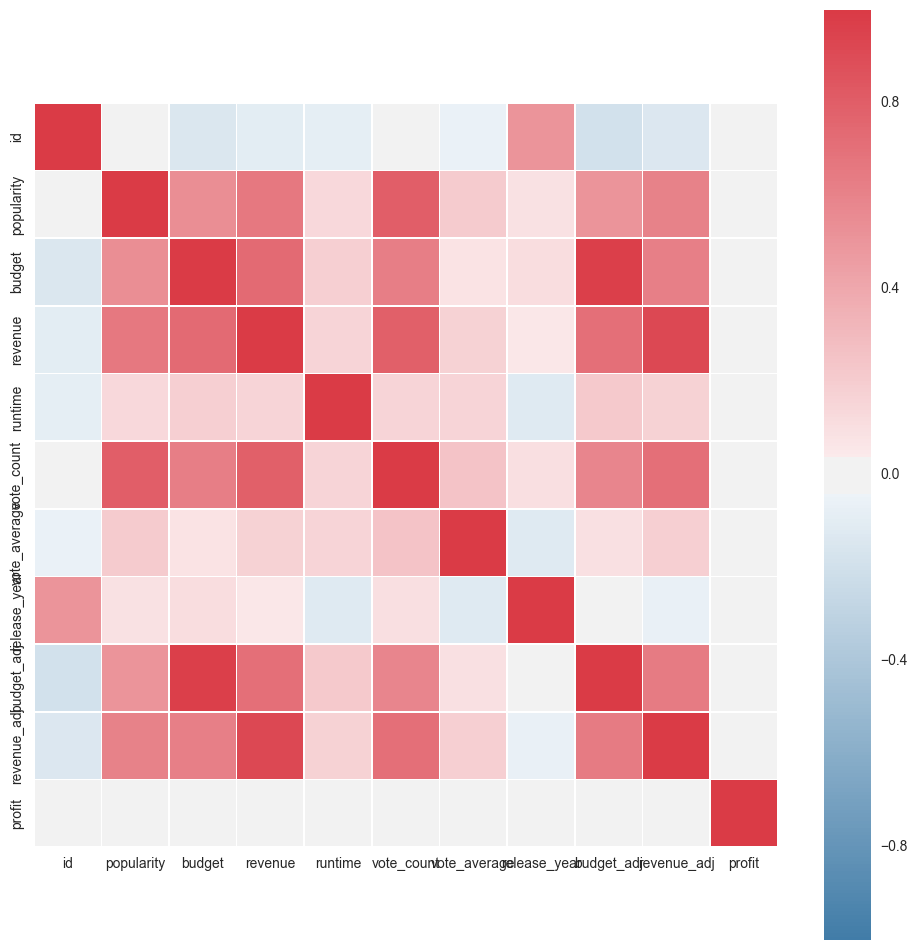

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
fig, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(240, 10, as_cmap = True)
sns.heatmap (corr, cmap = cmap, square=True, linewidths=.5)